In [12]:
import pandas as pd

df = pd.read_csv('merged_dataset2.csv')

df.head()

,user_id,plan,session_date,mb_used,total_messages_used,total_minutes
0,1000,ultimate,2018-12-26,270.99,11.0,16.0
1,1000,ultimate,2018-12-27,880.22,11.0,16.0
2,1000,ultimate,2018-12-28,660.40,11.0,16.0
3,1000,ultimate,2018-12-29,89.86,11.0,16.0
4,1000,ultimate,2018-12-31,0.00,11.0,16.0


PREDICTING DATA_USAGE

In [13]:
from prophet import Prophet

df2 = df.drop(columns=['plan','total_messages_used', 'total_minutes'])
df2.head()

,user_id,session_date,mb_used
0,1000,2018-12-26,270.99
1,1000,2018-12-27,880.22
2,1000,2018-12-28,660.40
3,1000,2018-12-29,89.86
4,1000,2018-12-31,0.00


In [14]:
specific_user_id = 1002 
filtered_df = df2[df2['user_id'] == specific_user_id]
filtered_df

,user_id,session_date,mb_used
250,1002,2018-10-22,686.01
251,1002,2018-10-22,939.47
252,1002,2018-10-22,295.50
253,1002,2018-10-23,0.00
254,1002,2018-10-23,668.82
...,...,...,...
369,1002,2018-12-27,0.00
370,1002,2018-12-29,0.00
371,1002,2018-12-29,849.56
372,1002,2018-12-30,743.31


In [15]:
user_id10002 = filtered_df.drop(columns='user_id')
user_id10002

,session_date,mb_used
250,2018-10-22,686.01
251,2018-10-22,939.47
252,2018-10-22,295.50
253,2018-10-23,0.00
254,2018-10-23,668.82
...,...,...
369,2018-12-27,0.00
370,2018-12-29,0.00
371,2018-12-29,849.56
372,2018-12-30,743.31


In [16]:
user_id1k2 = user_id10002.rename(columns={'session_date': 'ds', 'mb_used': 'y'})
user_id1k2.head()

,ds,y
250,2018-10-22,686.01
251,2018-10-22,939.47
252,2018-10-22,295.50
253,2018-10-23,0.00
254,2018-10-23,668.82


In [17]:
m = Prophet()
m.fit(user_id1k2)
future = m.make_future_dataframe(periods=14)
future.tail()

02:32:41 - cmdstanpy - INFO - Chain [1] start processing
02:32:41 - cmdstanpy - INFO - Chain [1] done processing


,ds
67,2019-01-10
68,2019-01-11
69,2019-01-12
70,2019-01-13
71,2019-01-14


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
42,2018-12-10,327.611744,-18.462490,664.115696
43,2018-12-13,293.160598,-61.820498,638.663406
44,2018-12-14,389.157056,58.661504,727.568917
45,2018-12-15,299.228749,-56.501311,662.764082
46,2018-12-16,322.685683,-31.037733,657.171673
47,2018-12-17,324.474130,-37.905219,664.741705
48,2018-12-18,297.286779,-40.858903,634.215725
49,2018-12-19,291.236414,-47.443986,602.116676
50,2018-12-20,290.022985,-49.667696,629.036289
51,2018-12-23,319.548069,-18.761385,684.821182


/Users/lordskyzw/Desktop/ZNA/app/zna/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/lordskyzw/Desktop/ZNA/app/zna/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



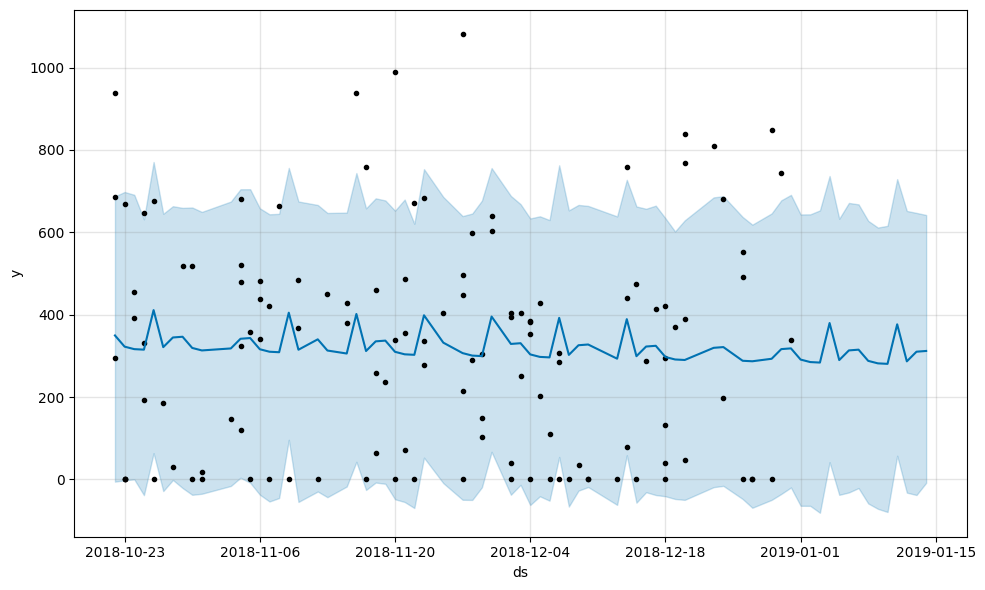

In [19]:
fig1 = m.plot(forecast)

In [21]:
type(fig1)

matplotlib.figure.Figure

/Users/lordskyzw/Desktop/ZNA/app/zna/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



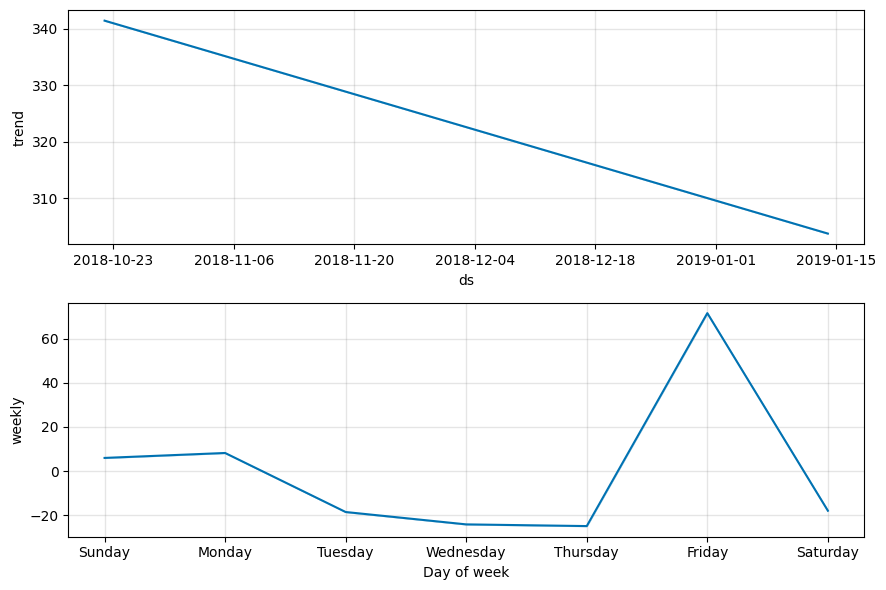

In [20]:
fig2 = m.plot_components(forecast)

In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 8, 15, 0, 0),
                          datetime.datetime(2018, 8, 16, 0, 0),
                          datetime.datetime(2018, 8, 16, 0, 0), ...,
                          datetime.datetime(2018, 12, 29, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'y': array([210.82,  82.78, 534.19, ..., 538.07,  19.9 , 448.34])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 8, 15, 0, 0),
                          datetime.datetime(2018, 8, 16, 0, 0),
                          datetime.datetime(2018, 8, 17, 0, 0),
                          datetime.datetime(2018, 8, 18, 0, 0),
                          datetime.datetime(2018, 8, 19, 0, 0),
                          datetime.datetime(2018, 8, 20, 0, 0),
                          datetime.datetime(2018, 8, 21, 0, 0),
                          datetime.datetime(2018, 8, 22, 0, 0),
                          datetime.datetime(2018, 8, 23, 0, 0),
                          datetime.datetime(2018, 8, 24, 0, 0),
                          datetime.datetime(2018, 8, 25, 0, 0),
                          datetime.datetime(2018, 8, 27, 0, 0),
                          datetime.datetime(2018, 8, 28, 0, 0),
                          datetime.datetime(2018, 8, 29, 0, 0),
                          datetime.datetime(2018, 8, 30, 0, 0),
                          datetime.datetime(2018, 8, 31, 0, 0),
                          datetime.datetime(2018, 9, 1, 0, 0),
                          datetime.datetime(2018, 9, 2, 0, 0),
                          datetime.datetime(2018, 9, 4, 0, 0),
                          datetime.datetime(2018, 9, 5, 0, 0),
                          datetime.datetime(2018, 9, 6, 0, 0),
                          datetime.datetime(2018, 9, 7, 0, 0),
                          datetime.datetime(2018, 9, 8, 0, 0),
                          datetime.datetime(2018, 9, 9, 0, 0),
                          datetime.datetime(2018, 9, 11, 0, 0),
                          datetime.datetime(2018, 9, 12, 0, 0),
                          datetime.datetime(2018, 9, 13, 0, 0),
                          datetime.datetime(2018, 9, 16, 0, 0),
                          datetime.datetime(2018, 9, 17, 0, 0),
                          datetime.datetime(2018, 9, 18, 0, 0),
                          datetime.datetime(2018, 9, 19, 0, 0),
                          datetime.datetime(2018, 9, 20, 0, 0),
                          datetime.datetime(2018, 9, 21, 0, 0),
                          datetime.datetime(2018, 9, 22, 0, 0),
                          datetime.datetime(2018, 9, 23, 0, 0),
                          datetime.datetime(2018, 9, 24, 0, 0),
                          datetime.datetime(2018, 9, 25, 0, 0),
                          datetime.datetime(2018, 9, 27, 0, 0),
                          datetime.datetime(2018, 9, 28, 0, 0),
                          datetime.datetime(2018, 9, 29, 0, 0),
                          datetime.datetime(2018, 9, 30, 0, 0),
                          datetime.datetime(2018, 10, 1, 0, 0),
                          datetime.datetime(2018, 10, 2, 0, 0),
                          datetime.datetime(2018, 10, 3, 0, 0),
                          datetime.datetime(2018, 10, 4, 0, 0),
                          datetime.datetime(2018, 10, 5, 0, 0),
                          datetime.datetime(2018, 10, 6, 0, 0),
                          datetime.datetime(2018, 10, 8, 0, 0),
                          datetime.datetime(2018, 10, 9, 0, 0),
                          datetime.datetime(2018, 10, 10, 0, 0),
                    

In [11]:

plot_components_plotly(m, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 8, 15, 0, 0),
                          datetime.datetime(2018, 8, 16, 0, 0),
                          datetime.datetime(2018, 8, 17, 0, 0),
                          datetime.datetime(2018, 8, 18, 0, 0),
                          datetime.datetime(2018, 8, 19, 0, 0),
                          datetime.datetime(2018, 8, 20, 0, 0),
                          datetime.datetime(2018, 8, 21, 0, 0),
                          datetime.datetime(2018, 8, 22, 0, 0),
                          datetime.datetime(2018, 8, 23, 0, 0),
                          datetime.datetime(2018, 8, 24, 0, 0),
                          datetime.datetime(2018, 8, 25, 0, 0),
                          datetime.datetime(2018, 8, 27, 0, 0),
                          datetime.datetime(2018, 8, 28, 0, 0),
                          datetime.datetime(2018, 8, 29, 0, 0),
                          datetime.datetime(2018, 8, 30, 0, 0),
                          datetime.datetime(2018, 8, 31, 0, 0),
                          datetime.datetime(2018, 9, 1, 0, 0),
                          datetime.datetime(2018, 9, 2, 0, 0),
                          datetime.datetime(2018, 9, 4, 0, 0),
                          datetime.datetime(2018, 9, 5, 0, 0),
                          datetime.datetime(2018, 9, 6, 0, 0),
                          datetime.datetime(2018, 9, 7, 0, 0),
                          datetime.datetime(2018, 9, 8, 0, 0),
                          datetime.datetime(2018, 9, 9, 0, 0),
                          datetime.datetime(2018, 9, 11, 0, 0),
                          datetime.datetime(2018, 9, 12, 0, 0),
                          datetime.datetime(2018, 9, 13, 0, 0),
                          datetime.datetime(2018, 9, 16, 0, 0),
                          datetime.datetime(2018, 9, 17, 0, 0),
                          datetime.datetime(2018, 9, 18, 0, 0),
                          datetime.datetime(2018, 9, 19, 0, 0),
                          datetime.datetime(2018, 9, 20, 0, 0),
                          datetime.datetime(2018, 9, 21, 0, 0),
                          datetime.datetime(2018, 9, 22, 0, 0),
                          datetime.datetime(2018, 9, 23, 0, 0),
                          datetime.datetime(2018, 9, 24, 0, 0),
                          datetime.datetime(2018, 9, 25, 0, 0),
                          datetime.datetime(2018, 9, 27, 0, 0),
                          datetime.datetime(2018, 9, 28, 0, 0),
                          datetime.datetime(2018, 9, 29, 0, 0),
                          datetime.datetime(2018, 9, 30, 0, 0),
                          datetime.datetime(2018, 10, 1, 0, 0),
                          datetime.datetime(2018, 10, 2, 0, 0),
                          datetime.datetime(2018, 10, 3, 0, 0),
                          datetime.datetime(2018, 10, 4, 0, 0),
                          datetime.datetime(2018, 10, 5, 0, 0),
                          datetime.datetime(2018, 10, 6, 0, 0),
                          datetime.datetime(2018, 10, 8, 0, 0),
                          datetime.datetime(2018, 10, 9, 0, 0),
                          datetime.datetime(2018, 10, 10, 0, 0),
                          datetime.datetime(2018, 10, 11, 0, 0),
                          datetime.datetime(2018, 10, 12, 0, 0),
                          datetime.datetime(2018, 10, 13, 0, 0),
                          datetime.datetime(2018, 10, 14, 0, 0),
                          datetime.datetime(2018, 10, 16, 0, 0),
                          datetime.datetime(2018, 10, 17, 0, 0),
                          datetime.datetime(2018, 10, 18, 0, 0),
                          datetime.datetime(2018, 10, 19, 0, 0),
                          datetime.datetime(2018, 10, 21, 0, 0),
                          datetime.datetime(2018, 10, 22, 0, 0